# Data Preprocessing


## 0.환경설정

### (1) 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

import joblib

### (2) 데이터 로딩
- 장애인 콜택시 운행 정보 : open_data.csv
- 날씨 데이터 : weather.csv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/AIVLE-SCHOOL/Prediction of call taxi waiting time for the disabled/'
file1 = 'open_data.csv'
file2 = 'weather.csv'

open_data = pd.read_csv(path + file1)
weather = pd.read_csv(path + file2)

### (3) 기본 정보 확인

In [4]:
open_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준일     2922 non-null   object 
 1   차량운행    2922 non-null   int64  
 2   접수건     2922 non-null   int64  
 3   탑승건     2922 non-null   int64  
 4   평균대기시간  2922 non-null   float64
 5   평균요금    2922 non-null   int64  
 6   평균승차거리  2922 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 159.9+ KB


In [5]:
open_data.head()

,기준일,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리
0,2015-01-01,213,1023,924,23.2,2427,10764
1,2015-01-02,420,3158,2839,17.2,2216,8611
2,2015-01-03,209,1648,1514,26.2,2377,10198
3,2015-01-04,196,1646,1526,24.5,2431,10955
4,2015-01-05,421,4250,3730,26.2,2214,8663


In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             4018 non-null   object 
 1   temp_max         4018 non-null   float64
 2   temp_min         4018 non-null   float64
 3   rain(mm)         4018 non-null   float64
 4   humidity_max(%)  4018 non-null   float64
 5   humidity_min(%)  4018 non-null   float64
 6   sunshine(MJ/m2)  4018 non-null   float64
dtypes: float64(6), object(1)
memory usage: 219.9+ KB


In [7]:
weather.head()

,Date,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
0,2012-01-01,0.4,-6.6,0.0,77.0,45.0,4.90
1,2012-01-02,-1.2,-8.3,0.0,80.0,48.0,6.16
2,2012-01-03,-0.4,-6.6,0.4,86.0,45.0,4.46
3,2012-01-04,-4.6,-9.5,0.0,66.0,38.0,8.05
4,2012-01-05,-1.4,-9.6,0.0,71.0,28.0,9.14


### (4) 컬럼명 변경

In [8]:
open_data = open_data.rename(columns={'기준일' : 'Date',
                                      '차량운행' : 'number of vehicle operations',
                                      '접수건' : 'number of applications',
                                      '탑승건' : 'number of boardings',
                                      '평균대기시간' : 'average wait time',
                                      '평균요금' : 'average rate',
                                      '평균승차거리' :'average ride distance'})

## 1.데이터 기본 탐색
> 주기별 분석
- 일, 요일, 주차, 월, 연도 별 컬럼 추가

In [9]:
data = open_data.copy()
# 컬럼 타입 변경
data['Date'] = pd.to_datetime(data['Date'])

# 일별 컬럼 추가
data['day'] = data['Date'].dt.day
# 요일별 컬럼 추가
data['day of Week'] = data['Date'].dt.dayofweek
# 주차 컬럼 추가
data['week'] = data['Date'].dt.isocalendar().week
# 월별 컬럼 추가
data['month'] = data['Date'].dt.month
# 연도별 컬럼 추가
data['year'] = data['Date'].dt.year

### (1) 일별 분석
- 차량 운행 수/접수건/탑승건/대기시간/운임/이동거리

In [10]:
data.groupby('day')[['number of vehicle operations', 'number of applications', 'number of boardings', 'average wait time','average rate', 'average ride distance']].mean()

,number of vehicle operations,number of applications,number of boardings,average wait time,average rate,average ride distance
day,,,,,,
1,388.375000,3462.656250,2875.177083,37.095833,2325.781250,9481.916667
2,419.520833,3925.177083,3277.520833,37.564583,2290.927083,9128.427083
3,408.614583,3725.281250,3129.187500,36.615625,2312.458333,9331.250000
4,418.666667,3886.364583,3269.989583,38.382292,2302.812500,9242.875000
5,408.968750,3755.000000,3153.093750,38.445833,2309.729167,9310.510417
6,409.031250,3740.760417,3148.364583,36.551042,2307.687500,9294.281250
7,427.583333,4030.062500,3377.666667,40.040625,2294.854167,9169.781250
8,428.739583,4058.052083,3399.833333,41.313542,2299.104167,9199.520833
9,409.052083,3770.041667,3180.666667,38.325000,2306.854167,9295.677083


### (2) 요일별 분석
- 차량 운행 수/접수건/탑승건/대기시간/운임/이동거리
- 0 : 월 ~ 6 : 일

In [11]:
data.groupby('day of Week')[['number of vehicle operations', 'number of applications', 'number of boardings', 'average wait time','average rate', 'average ride distance']].mean()

,number of vehicle operations,number of applications,number of boardings,average wait time,average rate,average ride distance
day of Week,,,,,,
0,485.014388,4715.040767,3961.242206,39.243165,2240.059952,8656.577938
1,495.076739,4800.884892,4026.791367,40.826139,2242.805755,8672.112710
2,484.726619,4739.333333,3956.976019,41.676259,2250.422062,8752.038369
3,494.078947,4760.677033,3978.200957,41.043780,2256.366029,8786.901914
4,485.107656,4692.066986,3877.385167,40.956459,2246.023923,8733.665072
5,262.177033,2069.081340,1693.839713,43.480144,2429.641148,10431.468900
6,224.767386,1702.781775,1493.556355,34.902878,2464.541966,10741.275779


- 요일별 분석 특징
> 주말은 차량 운행수/접수건/탑승건이 적은 편
>
> 평균 이동 거리는 오히려 많아짐
>
> 장애인 택시 이용량이 적었을 뿐더러 장거리 이동이 많았음

### (3) 월별 분석
- 차량 운행 수/접수건/탑승건/대기시간/운임/이동거리

In [12]:
data.groupby('month')[['number of vehicle operations', 'number of applications', 'number of boardings', 'average wait time','average rate', 'average ride distance']].mean()

,number of vehicle operations,number of applications,number of boardings,average wait time,average rate,average ride distance
month,,,,,,
1,379.286290,3681.826613,3092.262097,33.393952,2279.616935,9048.161290
2,373.486726,3582.097345,3032.075221,34.419469,2296.623894,9221.039823
3,398.758065,3691.330645,3168.822581,35.182258,2291.600806,9129.588710
4,416.187500,3964.479167,3358.558333,39.628750,2310.712500,9313.458333
5,413.556452,3910.572581,3278.435484,41.181452,2326.209677,9462.447581
6,430.925000,4001.304167,3372.837500,40.381667,2308.991667,9292.650000
7,436.935484,4099.637097,3437.862903,40.033468,2290.407258,9151.556452
8,434.500000,4014.963710,3350.512097,38.568952,2286.189516,9127.072581
9,446.412500,3962.508333,3287.950000,42.364167,2331.583333,9493.016667


### (4) 연도별 분석
- 차량 운행 수/접수건/탑승건/대기시간/운임/이동거리

In [13]:
data.groupby('year')[['number of vehicle operations', 'number of applications', 'number of boardings', 'average wait time','average rate', 'average ride distance']].mean()

,number of vehicle operations,number of applications,number of boardings,average wait time,average rate,average ride distance
year,,,,,,
2015,381.468493,3750.531507,3268.673973,34.059452,2301.523288,9558.975342
2016,390.314208,4005.087432,3418.183060,38.272404,2316.404372,9581.713115
2017,405.397260,4184.745205,3471.709589,44.143014,2321.558904,9311.230137
2018,397.758904,4077.473973,3209.380822,56.322192,2319.293151,9296.868493
2019,399.068493,4104.358904,3230.279452,53.455616,2316.846575,9258.534247
2020,416.521858,3137.480874,2656.314208,28.045082,2308.505464,9181.213115
2021,468.271233,3796.821918,3344.109589,30.720822,2270.000000,8864.536986
2022,490.898630,4350.304110,3673.863014,37.466027,2280.002740,8974.227397


## 2.데이터 구조 만들기
> 목표 : 전날 저녁, 다음날 평균 대기시간을 예측
- 날씨 데이터는 실제 측정값이지만, 다음 날에 대한 예보 데이터로 간주
- 즉, 특정 일의 날씨 데이터는 전날 날씨예보 데이터로 간주

### (1) 날씨 데이터 붙이기


In [14]:
# 특정 일의 날씨 데이터는 전날 날씨예보 데이터로 간주
weather['Date'] = weather['Date'].shift(1)
# 날씨 데이터 붙이기
open_data = pd.merge(open_data, weather, on = 'Date')

### (2) feature 생성
> 컬럼 추가 : 요일, 월, 계절, 연도, 공휴일, 최근 일주일 간의 평균 대기시간, 탑승률

#### 1) 날씨 관련 feature 추가
> 요일, 월, 계절, 연도
- EDA를 위해 범주형 변수로 변환

In [15]:
# 월 변수 적용 함수
def data_weather(month) :
    if 3 <= month <= 5 : return 'spring'
    elif 6 <= month <= 8 : return 'summer'
    elif 9 <= month <= 11 : return 'fall'
    else : return 'winter'

In [16]:
# 변수를 추가하기 위해 date를 datetime 타입으로 변경
open_data['Date'] = pd.to_datetime(open_data['Date'])
# 요일 변수 추가
open_data['day of Week'] = open_data['Date'].dt.dayofweek
# 월 변수 추가
open_data['month'] = open_data['Date'].dt.month
# 계절 변수 추가
open_data['weather'] = open_data.month.apply(lambda x : data_weather(x))
# 연도 변수 추가
open_data['year'] = open_data['Date'].dt.year

In [17]:
# 범주형으로 변환
open_data['day of Week'] = pd.Categorical(open_data['day of Week'])
open_data['month'] = pd.Categorical(open_data['month'])
open_data['weather'] = pd.Categorical(open_data['weather'])
open_data['year'] = pd.Categorical(open_data['year'])

#### 2) 공휴일 정보
> workalendar 패키지를 설치 후 대한민국 공휴일 정보 추출
- 중복되는 날짜 확인 후 행 제거

* 휴무일 데이터 패키지 설치

In [18]:
!pip install workalendar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 15.6 MB/s eta 0:00:00


In [19]:
# 휴무일 데이터셋 만들기 2015 ~ 2022

# 휴무일 컬럼 추가 - 공휴일의 경우 값을 1로, 공휴일이 아닌 경우 값을 0으로 설정
from workalendar.asia import SouthKorea
cal = SouthKorea()
holiday = pd.DataFrame(cal.holidays(year = 2015))

for i in range(2016, 2023) :
    holiday = pd.concat([holiday, pd.DataFrame(cal.holidays(i))])

holiday = holiday.rename(columns={0 : 'Date', 1 : 'holiday'})
holiday['holiday'] = 1
# 날짜가 중복되는 경우 행 제거
holiday = holiday.drop_duplicates()

# 휴무일 데이터 붙이기
holiday['Date'] = pd.to_datetime(holiday['Date'])
open_data = pd.merge(open_data, holiday, on = 'Date', how = 'left')
open_data = open_data.fillna(0)

#### 3) 7일 이동평균 대기시간

In [20]:
# 날짜에 따른 다른 컬럼 값과 7일 이동평균 대기시간의 차이가 크므로 결측치가 있는 앞의 7개 행 제거 
open_data['7-day moving average latency'] = open_data['average wait time'].rolling(window = 7).mean()
open_data = open_data.dropna(axis = 0)
open_data = open_data.reset_index(drop = True)

#### 4) 탑승률

In [21]:
open_data['boarding ratio'] = (lambda x, y : (x/y) * 100)(open_data['number of applications'], open_data['number of boardings'])

In [22]:
open_data

,Date,number of vehicle operations,number of applications,number of boardings,average wait time,average rate,average ride distance,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),day of Week,month,weather,year,holiday,7-day moving average latency,boarding ratio
0,2015-01-07,410,4085,3676,24.7,2230,8646,-0.2,-9.2,0.0,62.0,27.0,10.09,2,1,winter,2015,0.0,23.657143,111.126224
1,2015-01-08,419,4030,3728,21.2,2231,8683,3.2,-6.8,0.0,78.0,38.0,8.74,3,1,winter,2015,0.0,23.371429,108.100858
2,2015-01-09,424,4167,3813,21.8,2215,8506,4.3,-5.5,0.0,81.0,33.0,9.41,4,1,winter,2015,0.0,24.028571,109.284028
3,2015-01-10,215,1916,1645,41.2,2447,11123,2.3,-4.0,0.0,83.0,39.0,9.60,5,1,winter,2015,0.0,26.171429,116.474164
4,2015-01-11,187,1700,1572,28.8,2419,10806,3.4,-7.2,0.0,51.0,23.0,10.05,6,1,winter,2015,0.0,26.785714,108.142494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,2022-12-26,603,5555,4605,39.2,2163,7889,3.0,-7.3,0.0,86.0,51.0,10.25,0,12,winter,2022,0.0,43.485714,120.629750
2911,2022-12-27,669,5635,4654,44.4,2198,8178,-0.3,-5.4,0.1,92.0,40.0,10.86,1,12,winter,2022,0.0,42.771429,121.078642
2912,2022-12-28,607,5654,4648,44.8,2161,7882,1.7,-7.8,0.0,71.0,34.0,10.88,2,12,winter,2022,0.0,43.514286,121.643718
2913,2022-12-29,581,5250,4247,52.5,2229,8433,2.1,-4.0,0.0,87.0,38.0,10.84,3,12,winter,2022,0.0,42.957143,123.616671


## 3.데이터 저장
> Data Preprocessing이 끝난 데이터 저장하기


In [23]:
joblib.dump(open_data,path + 'data_preprocessing.pkl')

['/content/drive/MyDrive/AIVLE-SCHOOL/Prediction of call taxi waiting time for the disabled/data_preprocessing.pkl']

# Exploratory Data Analysis

In [24]:
# 데이터 로딩
data = joblib.load(path + 'data_preprocessing.pkl')

## 1.단변량 분석

### (1)기본 정보 확인

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          2915 non-null   datetime64[ns]
 1   number of vehicle operations  2915 non-null   int64         
 2   number of applications        2915 non-null   int64         
 3   number of boardings           2915 non-null   int64         
 4   average wait time             2915 non-null   float64       
 5   average rate                  2915 non-null   int64         
 6   average ride distance         2915 non-null   int64         
 7   temp_max                      2915 non-null   float64       
 8   temp_min                      2915 non-null   float64       
 9   rain(mm)                      2915 non-null   float64       
 10  humidity_max(%)               2915 non-null   float64       
 11  humidity_min(%)               

### (2) 범주형 변수 컬럼 추출

In [26]:
category = ['day of Week','month','year', 'weather', 'holiday']

### (3) 숫자형 변수 분석

column : number of vehicle operations
count    2915.000000
mean      418.973585
std       133.710103
min       132.000000
25%       278.000000
50%       455.000000
75%       522.000000
max      1413.000000
Name: number of vehicle operations, dtype: float64


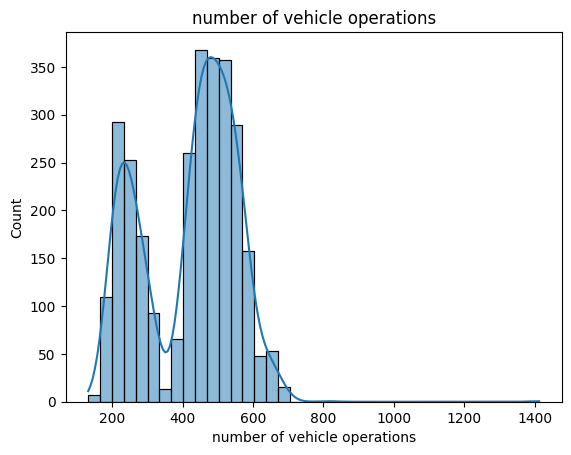

---------------------------------------------------------------------
column : number of applications
count    2915.000000
mean     3928.899828
std      1508.982665
min       527.000000
25%      2165.000000
50%      4723.000000
75%      5110.000000
max      6182.000000
Name: number of applications, dtype: float64


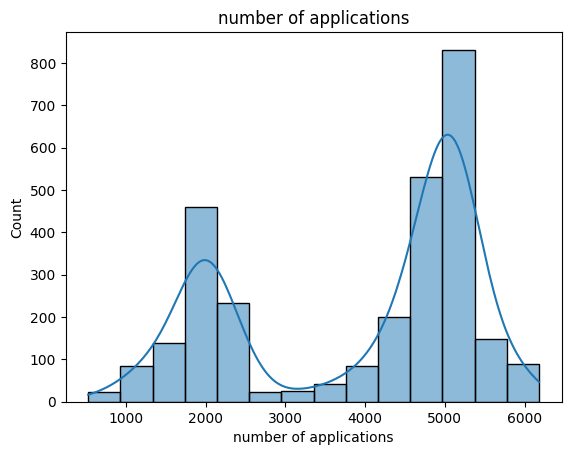

---------------------------------------------------------------------
column : number of boardings
count    2915.000000
mean     3286.301887
std      1248.672822
min       462.000000
25%      1779.500000
50%      3935.000000
75%      4241.500000
max      5189.000000
Name: number of boardings, dtype: float64


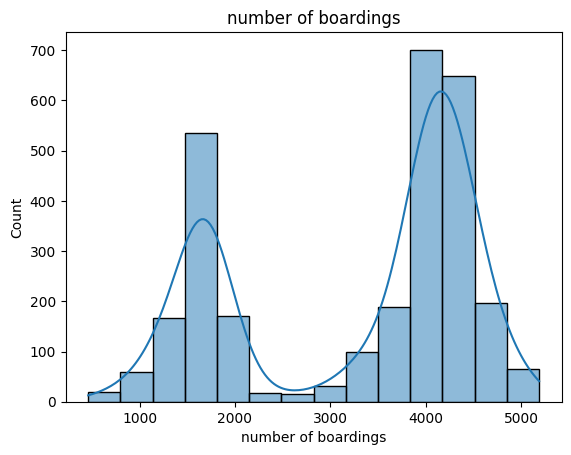

---------------------------------------------------------------------
column : average wait time
count    2915.000000
mean       40.342573
std        14.093565
min        17.600000
25%        29.700000
50%        38.300000
75%        48.700000
max        96.100000
Name: average wait time, dtype: float64


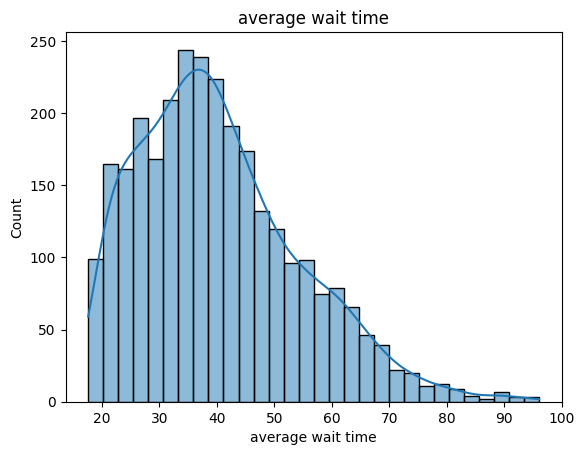

---------------------------------------------------------------------
column : average rate
count    2915.000000
mean     2304.250429
std       107.290936
min      2131.000000
25%      2228.000000
50%      2257.000000
75%      2400.500000
max      2733.000000
Name: average rate, dtype: float64


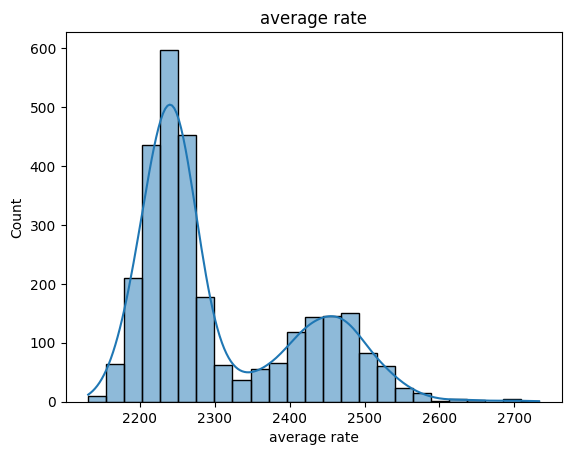

---------------------------------------------------------------------
column : average ride distance
count     2915.000000
mean      9252.677873
std       1019.182020
min       7672.000000
25%       8519.000000
50%       8821.000000
75%      10149.000000
max      14136.000000
Name: average ride distance, dtype: float64


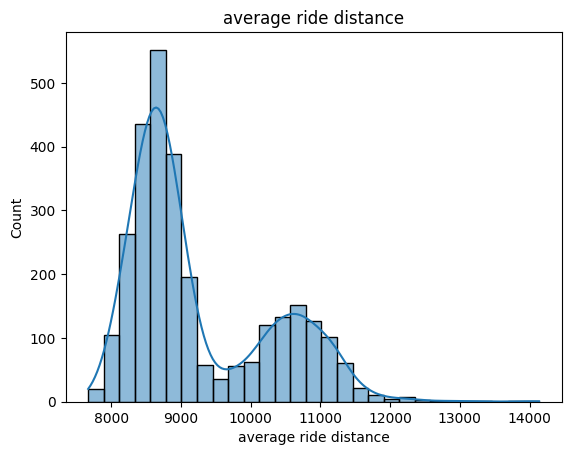

---------------------------------------------------------------------
column : temp_max
count    2915.000000
mean       18.107890
std        10.695041
min       -11.200000
25%         9.100000
50%        19.700000
75%        27.400000
max        39.400000
Name: temp_max, dtype: float64


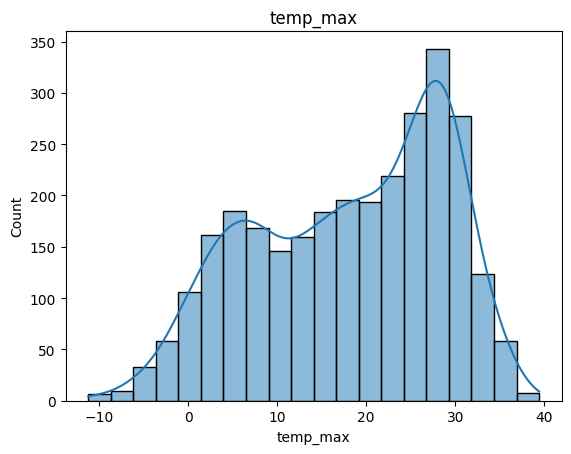

---------------------------------------------------------------------
column : temp_min
count    2915.000000
mean        9.446003
std        10.772029
min       -18.500000
25%         0.600000
50%        10.100000
75%        18.900000
max        30.400000
Name: temp_min, dtype: float64


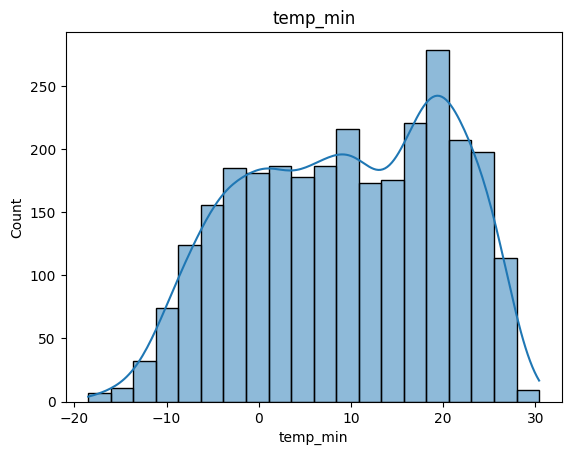

---------------------------------------------------------------------
column : rain(mm)
count    2915.000000
mean        3.362504
std        12.610002
min         0.000000
25%         0.000000
50%         0.000000
75%         0.300000
max       178.900000
Name: rain(mm), dtype: float64


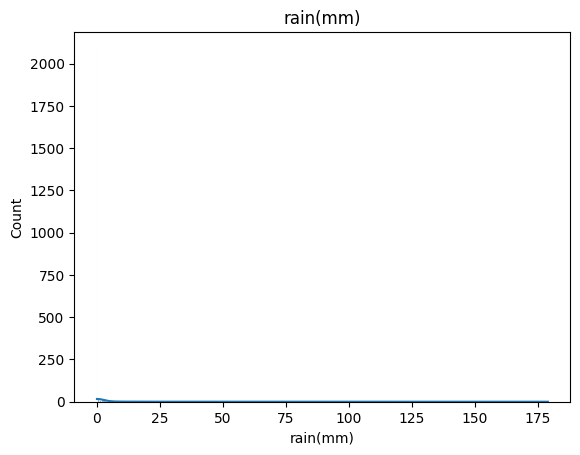

---------------------------------------------------------------------
column : humidity_max(%)
count    2915.000000
mean       79.109091
std        14.009475
min        29.000000
25%        70.000000
50%        82.000000
75%        90.000000
max       100.000000
Name: humidity_max(%), dtype: float64


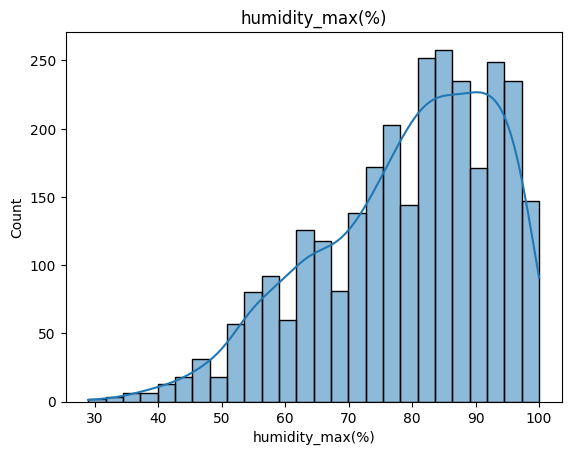

---------------------------------------------------------------------
column : humidity_min(%)
count    2915.000000
mean       41.125832
std        16.407647
min         7.000000
25%        29.000000
50%        39.000000
75%        51.000000
max        98.000000
Name: humidity_min(%), dtype: float64


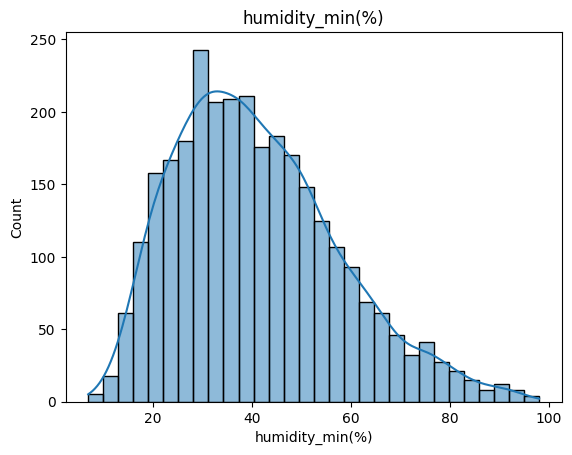

---------------------------------------------------------------------
column : sunshine(MJ/m2)
count    2915.000000
mean       13.508281
std         6.943734
min         0.000000
25%         8.245000
50%        12.710000
75%        18.605000
max        30.790000
Name: sunshine(MJ/m2), dtype: float64


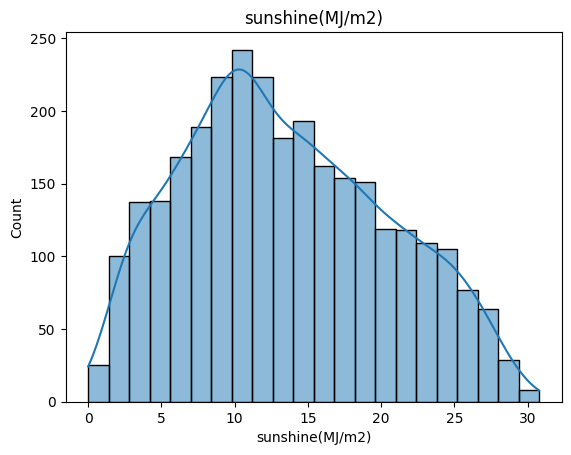

---------------------------------------------------------------------
column : 7-day moving average latency
count    2915.000000
mean       40.322235
std        12.031515
min        18.800000
25%        31.342857
50%        39.042857
75%        47.028571
max        83.928571
Name: 7-day moving average latency, dtype: float64


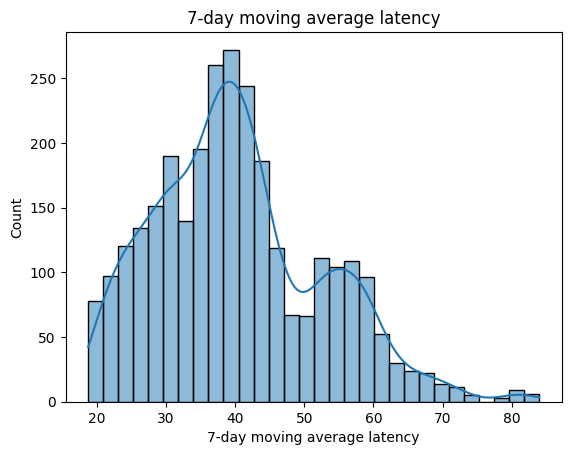

---------------------------------------------------------------------
column : boarding ratio
count    2915.000000
mean      119.318854
std         7.725723
min       103.215768
25%       113.939446
50%       118.266110
75%       124.086483
max       167.505241
Name: boarding ratio, dtype: float64


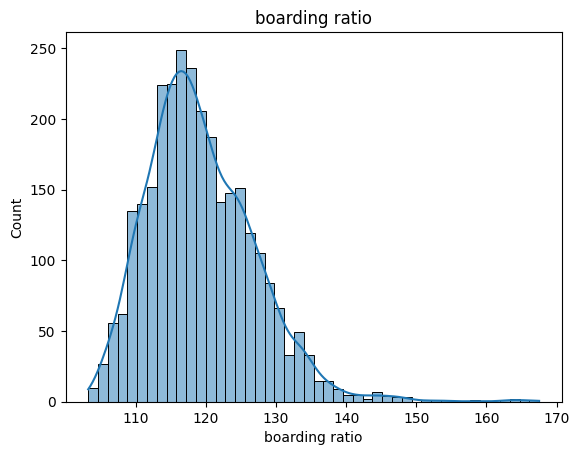

---------------------------------------------------------------------


In [27]:
# 숫자형 변수 분석
# Data 컬럼은 index에 해당하므로 제거
for col in data.drop(category + ['Date'], axis = 1).columns :
    print(f'column : {col}')
    print(data[col].describe())
    sns.histplot(data[col], kde=True)
    plt.title(col)
    plt.show()
    print('---------------------------------------------------------------------')

4) 범주형 변수 분석

column : day of Week
2    417
3    417
4    417
0    416
1    416
5    416
6    416
Name: day of Week, dtype: int64


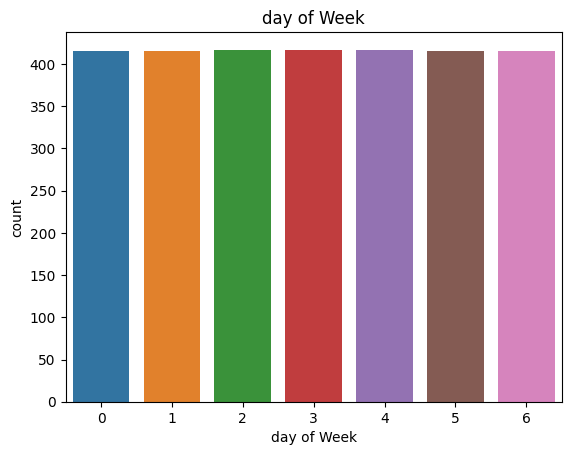

---------------------------------------------------------------------
column : month
3     248
5     248
7     248
8     248
10    248
12    247
1     242
4     240
6     240
9     240
11    240
2     226
Name: month, dtype: int64


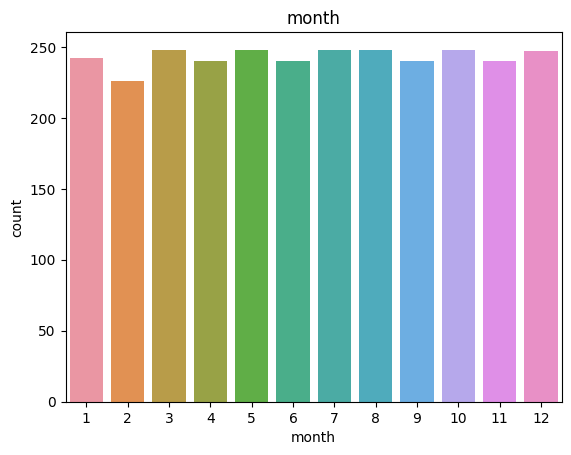

---------------------------------------------------------------------
column : year
2016    366
2020    366
2017    365
2018    365
2019    365
2021    365
2022    364
2015    359
Name: year, dtype: int64


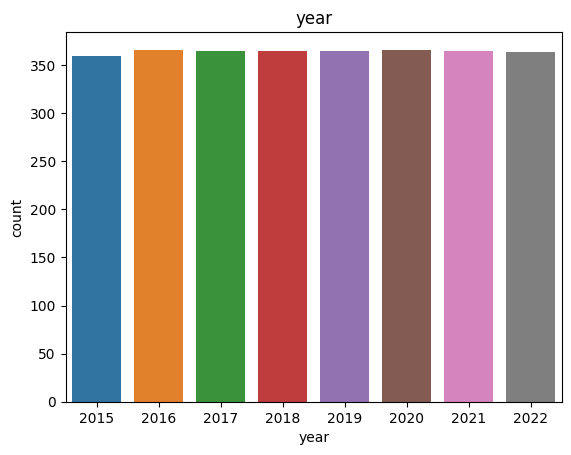

---------------------------------------------------------------------
column : weather
spring    736
summer    736
fall      728
winter    715
Name: weather, dtype: int64


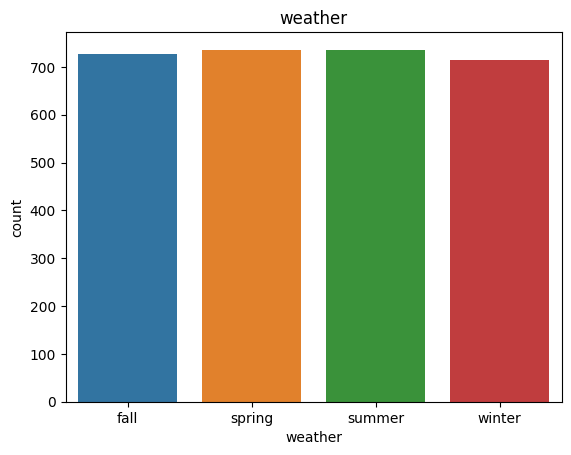

---------------------------------------------------------------------
column : holiday
0.0    2797
1.0     118
Name: holiday, dtype: int64


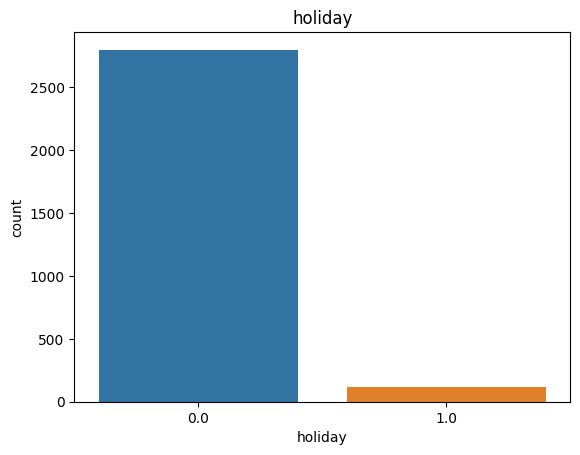

---------------------------------------------------------------------


In [28]:
# 범주형 변수 분석
for col in data[category] :
    print(f'column : {col}')
    print(data[col].value_counts())
    sns.countplot(x=col, data=data)
    plt.title(col)
    plt.show()
    print('---------------------------------------------------------------------')

## 2.이변량 분석

### (1) 숫자형 변수 --> Target

#### 1) Target 설정

In [29]:
target = 'average wait time'

#### 2) 전체 상관계수 시각화

<Axes: >

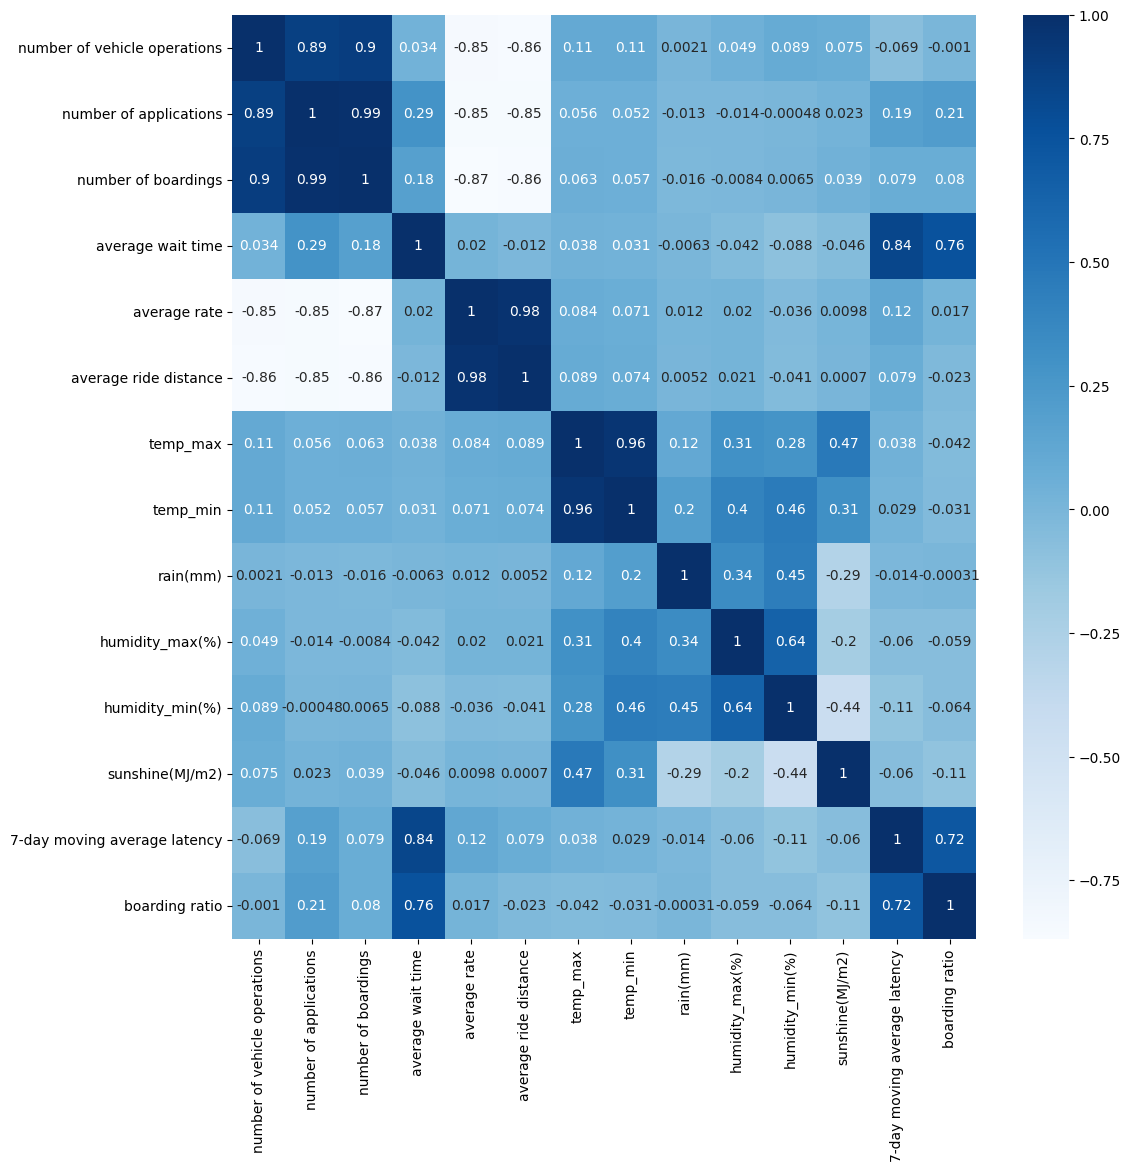

In [30]:
plt.figure(figsize = (12, 12))
sns.heatmap(data.drop(category + ['Date'], axis = 1).corr(),
            cmap = 'Blues',
            annot = True)

#### 3) 산점도

column : number of vehicle operations



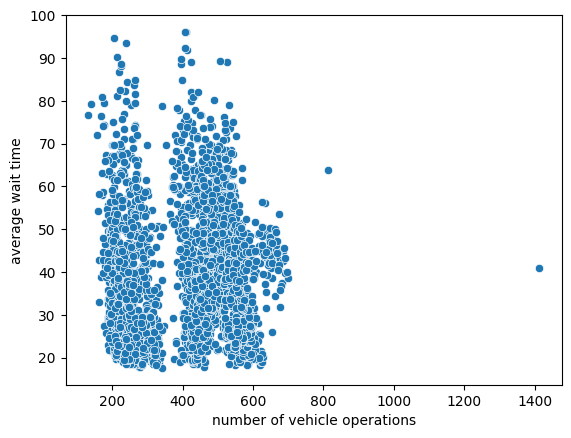

---------------------------------------------------------------------
column : number of applications



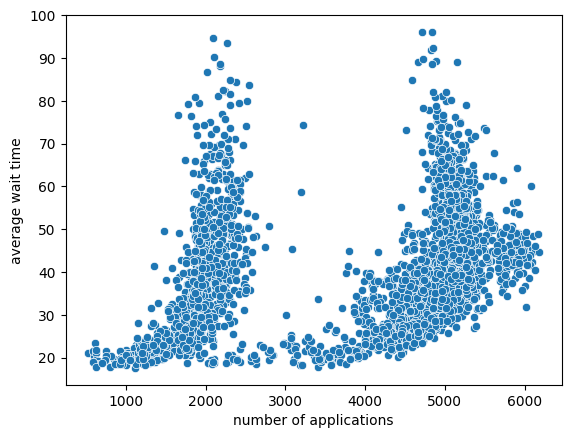

---------------------------------------------------------------------
column : number of boardings



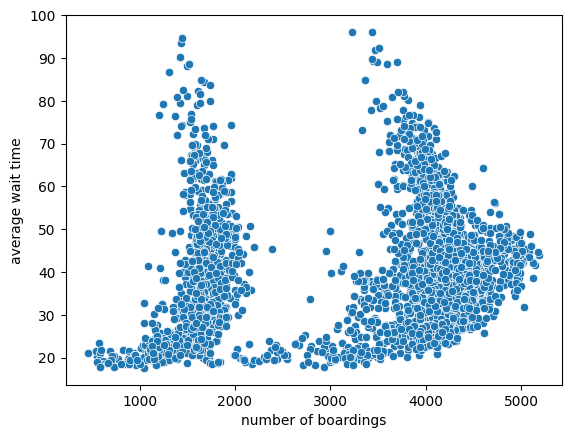

---------------------------------------------------------------------
column : average rate



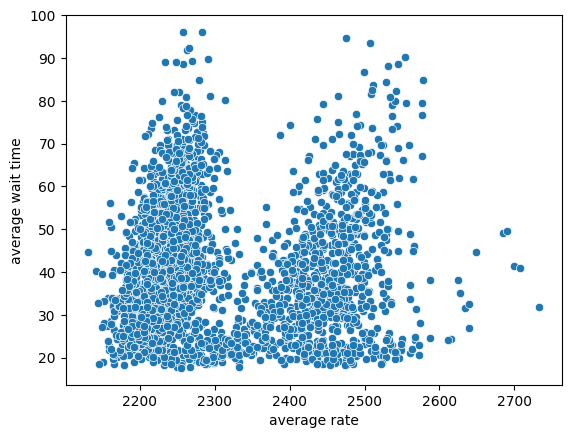

---------------------------------------------------------------------
column : average ride distance



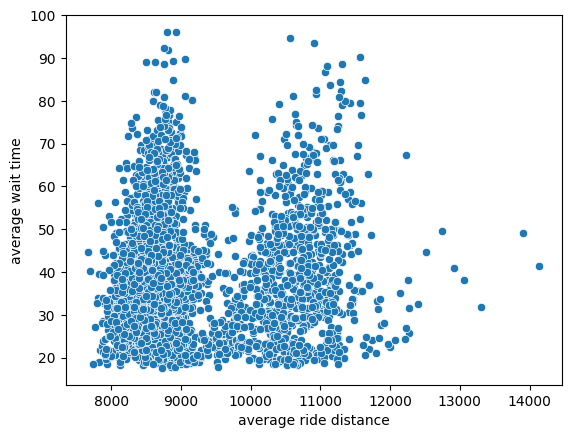

---------------------------------------------------------------------
column : temp_max



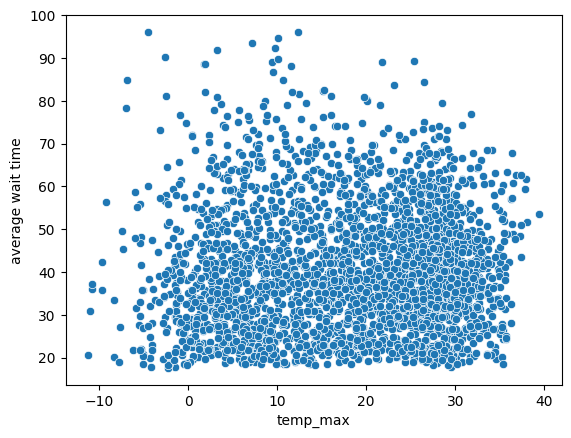

---------------------------------------------------------------------
column : temp_min



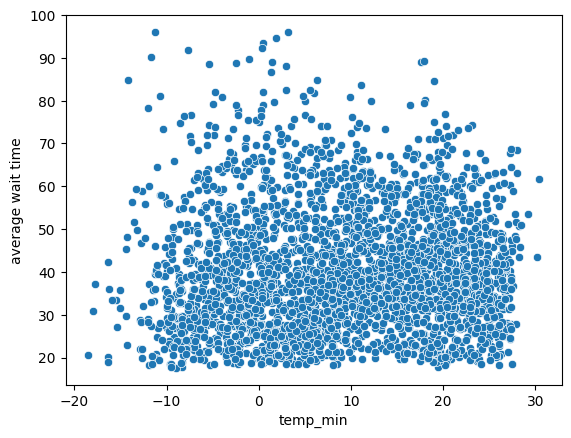

---------------------------------------------------------------------
column : rain(mm)



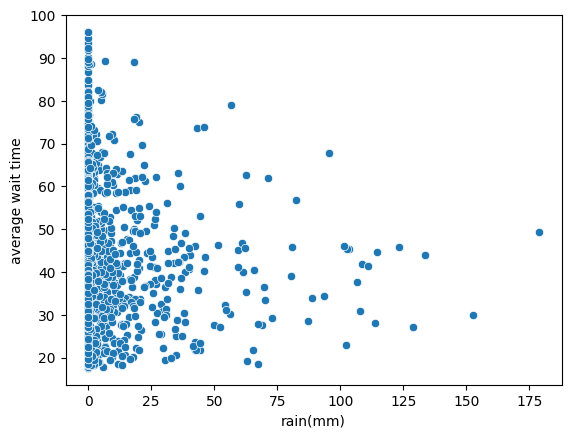

---------------------------------------------------------------------
column : humidity_max(%)



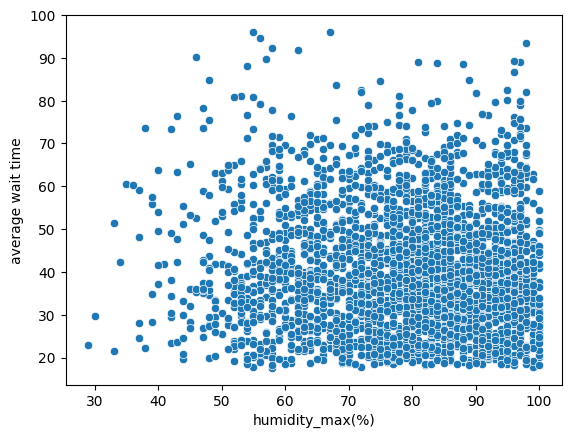

---------------------------------------------------------------------
column : humidity_min(%)



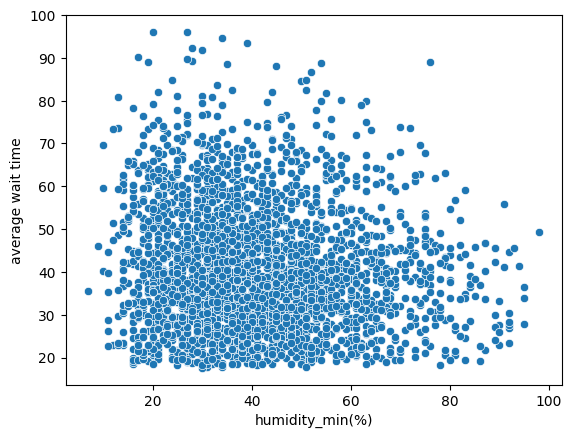

---------------------------------------------------------------------
column : sunshine(MJ/m2)



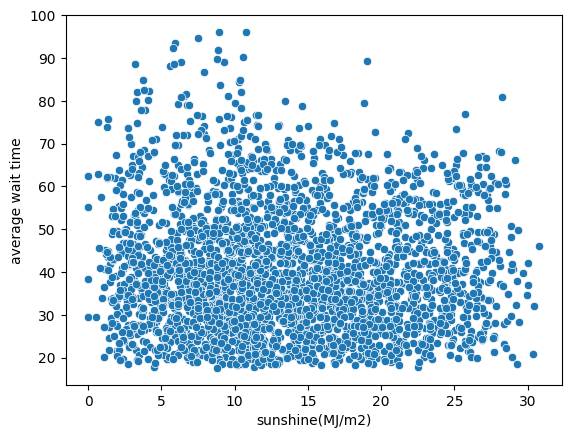

---------------------------------------------------------------------
column : 7-day moving average latency



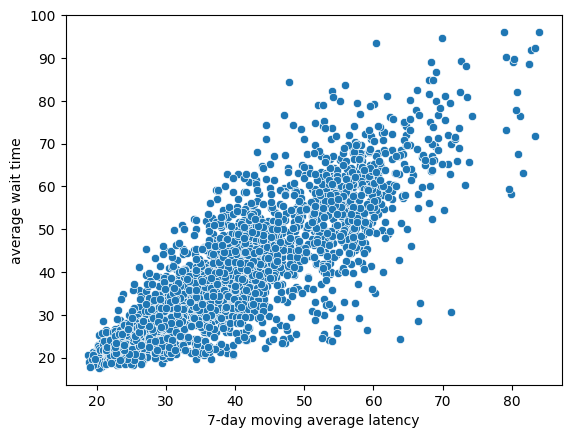

---------------------------------------------------------------------
column : boarding ratio



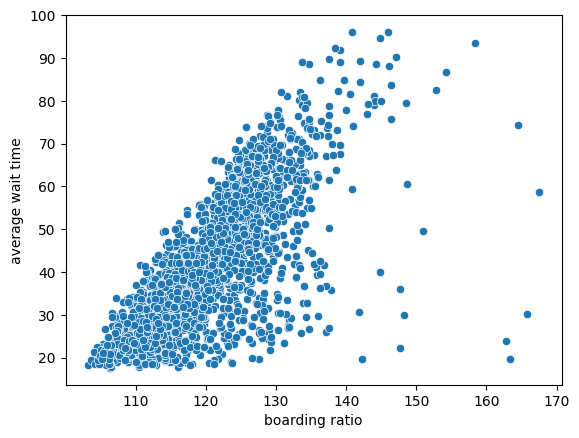

---------------------------------------------------------------------


In [31]:
for col in data.drop(category + ['Date', target], axis = 1).columns :
    print(f'column : {col}\n')
    sns.scatterplot(data = data, x = col, y = target)
    plt.show()
    print('---------------------------------------------------------------------')

#### 4) 상관 분석
>p_value < 0.05이면 두 변수 간에 관계가 있다.
>
>p_value >= 0.05 이면, 두 변수 간에 관계가 없다.

>상관 계수
>
>strong : 0.5 < |r| <= 1
>
>middle : 0.2 < |r| <= 0.5
>
>weak : |r| <= 0.2

In [32]:
# Target과 연관성 있는 featuer 구분
strong, middle, weak = list(), list(), list()

In [33]:
# p-value와 상관 계수 값에 따른 feature 구분
for col in data.drop(category + ['Date', target], axis = 1).columns :
    spst.pearsonr(data[col], data[target])
    if spst.pearsonr(data[col], data[target])[1] <0.05 :
        if abs(spst.pearsonr(data[col], data[target])[0]) > 0.5 :
            strong.append(col)
        elif abs(spst.pearsonr(data[col], data[target])[0]) > 0.2 :
            middle.append(col)
        else :
            weak.append(col)

### (2) 범주형 변수 --> Target

>t-통계량 : 2보다 클 때 의미가 있다
>
>P-value : 0.05보다 작을 때 의미가 있다.

In [34]:
# t-통계량과 P-value 값에 따른 feature 구분을 위한 변수 선언
categorical_data_values = {}

#### 1) 요일별 feature -> target

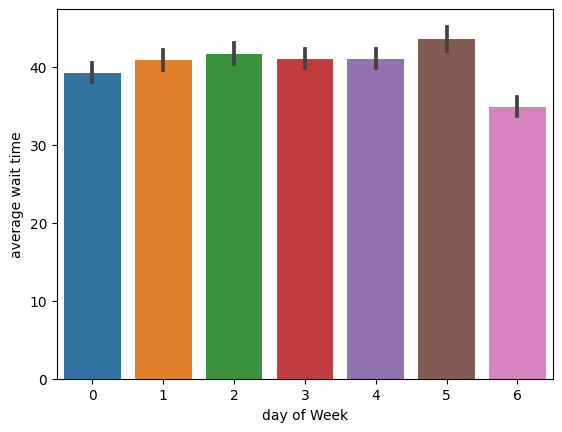

One-way ANOVA p-value:  7.076400998153793e-18


In [35]:
sns.barplot(data, x='day of Week', y=target)
plt.show()

temp = data.copy()
f, p = spst.f_oneway(*[temp[temp['day of Week']==i][target] for i in range(7)])
categorical_data_values['day of Week'] = p
print("One-way ANOVA p-value: ", p)

#### 2) 월별 feature -> target

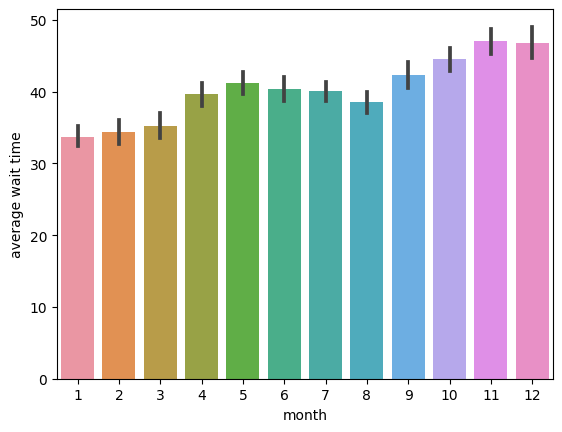

One-way ANOVA p-value:  3.8788750406482805e-53


In [36]:
sns.barplot(data, x='month', y=target)
plt.show()

temp = data.copy()
f, p = spst.f_oneway(*[temp[temp['month']==i][target] for i in range(1, 13)])
categorical_data_values['month'] = p
print("One-way ANOVA p-value: ", p)

#### 3) 연도별 feature -> target

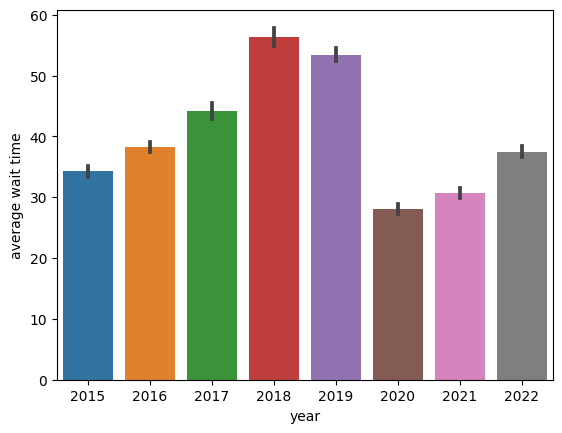

One-way ANOVA p-value:  0.0


In [37]:
sns.barplot(data, x='year', y=target)
plt.show()

temp = data.copy()
f, p = spst.f_oneway(*[temp[temp['year']==i][target] for i in temp['year'].unique()])
categorical_data_values['year'] = p
print("One-way ANOVA p-value: ", p)

#### 4) 계절별 feature -> target

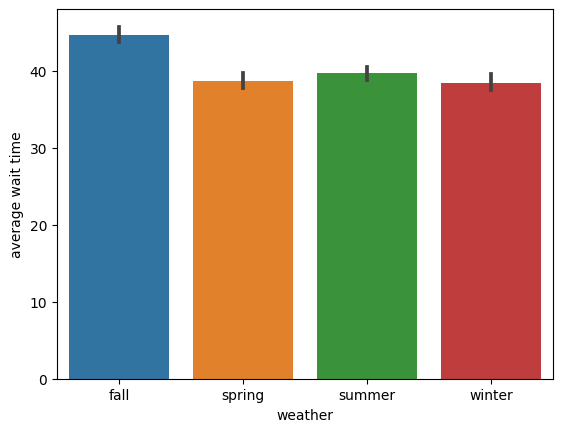

One-way ANOVA p-value:  2.285872268452656e-20


In [38]:
sns.barplot(data, x='weather', y=target)
plt.show()

temp = data.copy()
weather_mapping = {'spring':0, 'summer':1, 'fall':2, 'winter':3}
temp['weather'] = temp['weather'].map(weather_mapping)
f, p = spst.f_oneway(*[temp[temp['weather']==i][target] for i in range(0, 4)])
categorical_data_values['weather'] = p
print("One-way ANOVA p-value: ", p)

#### 5) 공휴일 여부 feature -> target

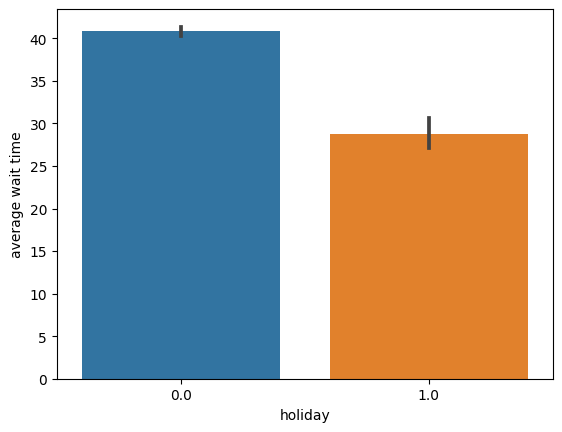

Ttest_indResult(statistic=-154.377337806217, pvalue=0.0)

In [39]:
sns.barplot(data, x='holiday', y=target)
plt.show()

categorical_data_values['holiday'] = p
spst.ttest_ind(data['holiday'], data[target])

In [40]:
# t-통계량과 P-value 값에 따른 feature 구분
for key, value in categorical_data_values.items() :
    if (key == 'holiday' and value >= 2) or (key!= 'holiday' and value <= 0.05): 
        strong.append(key)
    else : weak.append(key)

## 3.EDA에 따른 feature 추출

In [41]:
data = data[strong+middle]

In [42]:
joblib.dump(data,path + 'data_EDA.pkl')

['/content/drive/MyDrive/AIVLE-SCHOOL/Prediction of call taxi waiting time for the disabled/data_EDA.pkl']

# Modeling

## 0.환경설정

### (1) 데이터 로딩

In [163]:
# 데이터 로딩
data = joblib.load(path + 'data_preprocessing.pkl')

In [164]:
data = data.set_index('Date')

### (2) 데이터 로딩라이브러리 불러오기

In [134]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [144]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from keras.backend import clear_session
from keras.layers import Input, Dense, Dropout, GRU
from keras.models import Model
from keras.optimizers import SGD

from keras.callbacks import EarlyStopping

from catboost import CatBoostRegressor
from scipy.stats import randint
from sklearn.utils.fixes import loguniform
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

## 1.데이터 준비

### (1) 가변수화

In [165]:
col = ['day of Week', 'month', 'weather', 'year']
data = pd.get_dummies(data = data, columns = col, drop_first = True)

### (2) 데이터 분할

> 마지막 91일 간의 데이터를 Test Data로 설정(2022-10-01 ~)

#### 1) 데이터셋 분할

In [166]:
train_dataset = data[:data.loc[data.index == '2022-10-01'].index[0]]
test_dataset = data[data.loc[data.index == '2022-10-01'].index[0]:]

#### 2) X, y 나누기

In [167]:
X = train_dataset.drop('average wait time',axis = 1)
y = train_dataset['average wait time']

In [168]:
x_test = test_dataset.drop('average wait time',axis = 1)
y_test = test_dataset['average wait time']

## 2.모델링


In [179]:
model_cat = CatBoostRegressor(eval_metric='MAE')

param_grid = {
    'n_estimators': randint(100, 300),
    'depth': randint(1, 5),
    'learning_rate': loguniform(1e-3, 0.1),
    'min_child_samples': randint(10, 40),
    'grow_policy': ['SymmetricTree', 'Lossguide', 'Depthwise']
}

model_cat.randomized_search(param_grid,
                            X, y,
                            cv=3, 
                            n_iter=10)

0:	learn: 39.9348125	test: 40.0598127	best: 40.0598127 (0)	total: 947us	remaining: 121ms
1:	learn: 39.6588882	test: 39.7838354	best: 39.7838354 (1)	total: 2.51ms	remaining: 160ms
2:	learn: 39.3849055	test: 39.5121087	best: 39.5121087 (2)	total: 3.32ms	remaining: 140ms
3:	learn: 39.1127176	test: 39.2400401	best: 39.2400401 (3)	total: 4.12ms	remaining: 129ms
4:	learn: 38.8425292	test: 38.9710877	best: 38.9710877 (4)	total: 5.38ms	remaining: 134ms
5:	learn: 38.5741571	test: 38.7027503	best: 38.7027503 (5)	total: 6.22ms	remaining: 128ms
6:	learn: 38.3076428	test: 38.4363968	best: 38.4363968 (6)	total: 6.94ms	remaining: 121ms
7:	learn: 38.0430658	test: 38.1732526	best: 38.1732526 (7)	total: 7.55ms	remaining: 114ms
8:	learn: 37.7802152	test: 37.9103980	best: 37.9103980 (8)	total: 8.21ms	remaining: 110ms
9:	learn: 37.5191812	test: 37.6531665	best: 37.6531665 (9)	total: 8.85ms	remaining: 105ms
10:	learn: 37.2598888	test: 37.3939225	best: 37.3939225 (10)	total: 9.59ms	remaining: 103ms
11:	learn

## 3.성능 확인


In [185]:
y_pred_cat = model_cat.predict(x_test)
y_pred_cat = pd.Series(y_pred_cat, index=y_test.index)

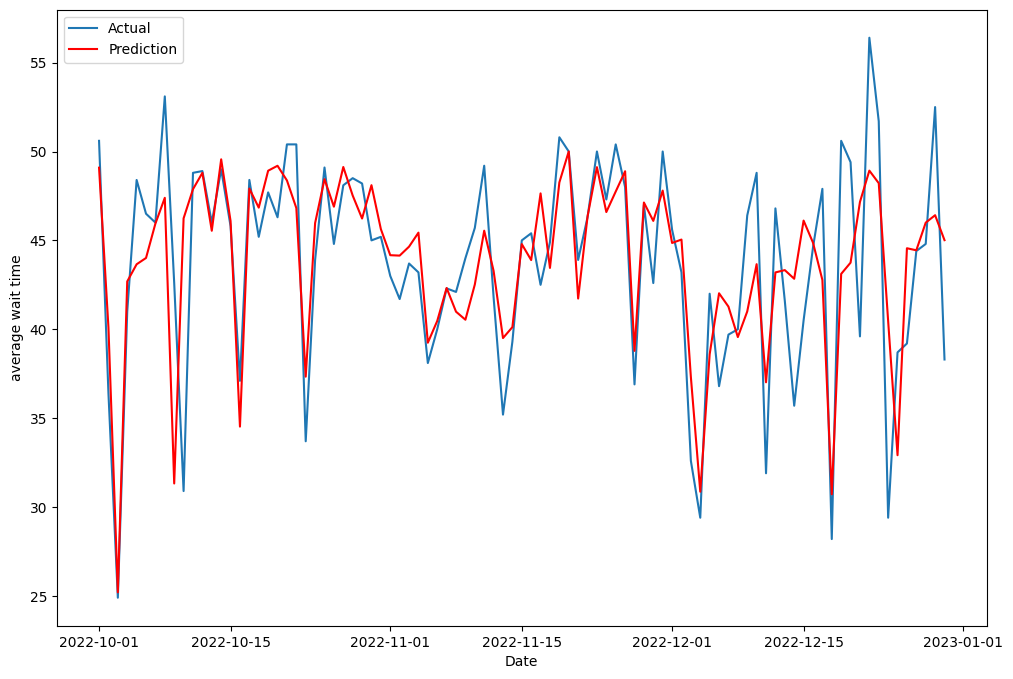

In [190]:
plt.figure(figsize = (12, 8))
plt.plot(y_test)
plt.plot(y_pred_cat, color = 'r')
plt.xlabel('Date')
plt.ylabel('average wait time')
plt.legend(['Actual', 'Prediction'])

In [183]:
y_pred_cat = model_cat.predict(x_test)

print(f'MAE : {(mean_absolute_error(y_test, y_pred_cat))}')
print(f'MAPE : {(mean_absolute_percentage_error(y_test, y_pred_cat))}')

MAE : 2.8667368330761733
MAPE : 0.06982563337396955
